In [3]:
from sklearn.feature_extraction.text import CountVectorizer

import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [4]:
with open("../datasets/shakespeare.txt") as f:
    shakespeare = f.readlines()

shakespeare

['THE SONNETS\n',
 '\n',
 'by William Shakespeare\n',
 '\n',
 'From fairest creatures we desire increase,\n',
 "That thereby beauty's rose might never die,\n",
 'But as the riper should by time decease,\n',
 'His tender heir might bear his memory:\n',
 'But thou contracted to thine own bright eyes,\n',
 "Feed'st thy light's flame with self-substantial fuel,\n",
 'Making a famine where abundance lies,\n',
 'Thy self thy foe, to thy sweet self too cruel:\n',
 "Thou that art now the world's fresh ornament,\n",
 'And only herald to the gaudy spring,\n',
 'Within thine own bud buriest thy content,\n',
 "And tender churl mak'st waste in niggarding:\n",
 'Pity the world, or else this glutton be,\n',
 "To eat the world's due, by the grave and thee.\n",
 '\n',
 'When forty winters shall besiege thy brow,\n',
 "And dig deep trenches in thy beauty's field,\n",
 "Thy youth's proud livery so gazed on now,\n",
 'Will be a tattered weed of small worth held:  \n',
 'Then being asked, where all thy bea

In [ ]:
# CountVectorizer : 문장을 토큰화, 문서 단어 행렬 (DTM : Document Term matrix = 희소행렬 sparse matrix) 생성
# stop words : 불용어 (사전) -> 큰 의미가 없는 단어들 (and, but,...)
# 영어에 대한 불용어를 실행해줘.
cv = CountVectorizer(stop_words="english")
cnt = cv.fit_transform(shakespeare)
cnt.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [6]:
cnt.toarray().sum(axis=0)

array([ 2,  2,  1, ..., 16,  2,  1])

In [7]:
cv.get_feature_names_out()

array(['abhor', 'abide', 'able', ..., 'youth', 'youthful', 'zealous'],
      dtype=object)

In [ ]:
# 어떤 단어가 몇개 있는지 합쳐서 보자.
cnt_dict = dict(zip(cv.get_feature_names_out(), cnt.toarray().sum(axis=0)))
cnt_dict

{'abhor': np.int64(2),
 'abide': np.int64(2),
 'able': np.int64(1),
 'absence': np.int64(5),
 'absent': np.int64(4),
 'abundance': np.int64(4),
 'abundant': np.int64(1),
 'abuse': np.int64(3),
 'abused': np.int64(1),
 'abuses': np.int64(1),
 'abysm': np.int64(1),
 'accents': np.int64(1),
 'acceptable': np.int64(1),
 'acceptance': np.int64(1),
 'accessary': np.int64(1),
 'accident': np.int64(1),
 'accidents': np.int64(1),
 'account': np.int64(4),
 'accumulate': np.int64(1),
 'accuse': np.int64(2),
 'accusing': np.int64(1),
 'achieve': np.int64(1),
 'acknowledge': np.int64(1),
 'acquaintance': np.int64(3),
 'acquainted': np.int64(2),
 'act': np.int64(1),
 'action': np.int64(3),
 'active': np.int64(1),
 'actor': np.int64(1),
 'add': np.int64(4),
 'added': np.int64(2),
 'adder': np.int64(1),
 'addeth': np.int64(1),
 'adding': np.int64(1),
 'addition': np.int64(2),
 'adieu': np.int64(1),
 'adjunct': np.int64(2),
 'admire': np.int64(1),
 'admired': np.int64(1),
 'admiring': np.int64(1),
 'ad

In [9]:
# 데이터 프레임 만들어보자
counts_df = pd.DataFrame.from_dict(cnt_dict, orient="index", columns=["freq"])
counts_df.index.name = "token"

In [10]:
counts_df.sort_values(by="freq", ascending=False, inplace=True)
counts_df

,freq
token,
thy,287
thou,235
love,194
thee,162
doth,88
...,...
harder,1
hard,1
happies,1


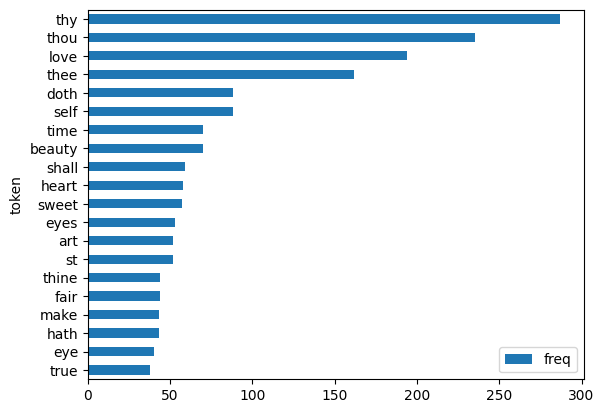

In [11]:
ax = counts_df.head(20).plot(kind="barh")
ax.invert_yaxis()

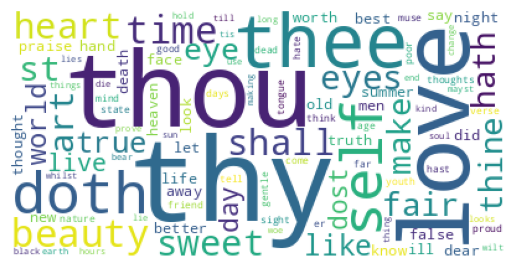

In [ ]:
cloud = WordCloud(background_color="white", max_words=100)
visual = cloud.fit_words(cnt_dict)

plt.axis("off")

plt.imshow(visual.to_image())

# thou : 너, thee : 너를 / thy : 그대의 => 엣날 영어라서 (불용어 사전에 없나보다)